In [1]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 71538, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
^Cceiving objects:  38% (27810/71538), 230.23 MiB | 705.00 KiB/s 


In [ ]:
import os

In [ ]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [ ]:


paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }



In [ ]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

NameError: name 'CUSTOM_MODEL_NAME' is not defined

In [ ]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}



In [ ]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}



In [ ]:


# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler -y
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 



Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.6.1.3-2ubuntu5).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
Processing /notebooks/Tensorflow/models/research
  Preparing metadata (setup.py) ... done


  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=21907543 sha256=9a01fb1605f86349ba152de54ef2dad640321f97578d114551405bd3d467829a
  Stored in directory: /tmp/pip-ephem-wheel-cache-brgtomp2/wheels/f7/a0/dc/fa5f01d2fa77f2001ffda4189d753c709c72f89e1968675242
Successfully built object-detection
  Attempting uninstall: object-detection
    Found existing installation: object-detection 0.1
    Uninstalling object-detection-0.1:
      Successfully uninstalled object-detection-0.1
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [ ]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

2022-03-30 15:55:23.821708: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-30 15:55:23.870034: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-30 15:55:23.870616: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
Running tests under Python 3.8.10: /usr/bin/python
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2022-03-30 15:55:23.880159: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critic

INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_faster_rcnn_models_from_config_mask_rcnn_without_matmul): 0.09s
I0330 15:55:29.523646 139712278705984 test_util.py:2373] time(__main__.ModelBuilderTF2Test.test_create_faster_rcnn_models_from_config_mask_rcnn_without_matmul): 0.09s
[       OK ] ModelBuilderTF2Test.test_create_faster_rcnn_models_from_config_mask_rcnn_without_matmul
[ RUN      ] ModelBuilderTF2Test.test_create_rfcn_model_from_config
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_rfcn_model_from_config): 0.09s
I0330 15:55:29.616677 139712278705984 test_util.py:2373] time(__main__.ModelBuilderTF2Test.test_create_rfcn_model_from_config): 0.09s
[       OK ] ModelBuilderTF2Test.test_create_rfcn_model_from_config
[ RUN      ] ModelBuilderTF2Test.test_create_ssd_fpn_model_from_config
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_ssd_fpn_model_from_config): 0.03s
I0330 15:55:29.646966 139712278705984 test_util.py:2373] time(__main__.Model

I0330 15:55:33.299311 139712278705984 ssd_efficientnet_bifpn_feature_extractor.py:145] EfficientDet EfficientNet backbone version: efficientnet-b2
I0330 15:55:33.299491 139712278705984 ssd_efficientnet_bifpn_feature_extractor.py:147] EfficientDet BiFPN num filters: 112
I0330 15:55:33.299562 139712278705984 ssd_efficientnet_bifpn_feature_extractor.py:148] EfficientDet BiFPN num iterations: 5
I0330 15:55:33.301186 139712278705984 efficientnet_model.py:144] round_filter input=32 output=32
I0330 15:55:33.317222 139712278705984 efficientnet_model.py:144] round_filter input=32 output=32
I0330 15:55:33.317344 139712278705984 efficientnet_model.py:144] round_filter input=16 output=16
I0330 15:55:33.640117 139712278705984 efficientnet_model.py:144] round_filter input=16 output=16
I0330 15:55:33.640297 139712278705984 efficientnet_model.py:144] round_filter input=24 output=24
I0330 15:55:33.894846 139712278705984 efficientnet_model.py:144] round_filter input=24 output=24
I0330 15:55:33.895093 13

I0330 15:55:37.760339 139712278705984 efficientnet_model.py:144] round_filter input=16 output=24
I0330 15:55:37.760509 139712278705984 efficientnet_model.py:144] round_filter input=24 output=32
I0330 15:55:38.376414 139712278705984 efficientnet_model.py:144] round_filter input=24 output=32
I0330 15:55:38.376593 139712278705984 efficientnet_model.py:144] round_filter input=40 output=56
I0330 15:55:38.698195 139712278705984 efficientnet_model.py:144] round_filter input=40 output=56
I0330 15:55:38.698368 139712278705984 efficientnet_model.py:144] round_filter input=80 output=112
I0330 15:55:39.221964 139712278705984 efficientnet_model.py:144] round_filter input=80 output=112
I0330 15:55:39.222165 139712278705984 efficientnet_model.py:144] round_filter input=112 output=160
I0330 15:55:39.723424 139712278705984 efficientnet_model.py:144] round_filter input=112 output=160
I0330 15:55:39.723600 139712278705984 efficientnet_model.py:144] round_filter input=192 output=272
I0330 15:55:40.370652 

I0330 15:55:46.677915 139712278705984 efficientnet_model.py:144] round_filter input=112 output=200
I0330 15:55:46.678089 139712278705984 efficientnet_model.py:144] round_filter input=192 output=344
I0330 15:55:47.736829 139712278705984 efficientnet_model.py:144] round_filter input=192 output=344
I0330 15:55:47.737025 139712278705984 efficientnet_model.py:144] round_filter input=320 output=576
I0330 15:55:48.029426 139712278705984 efficientnet_model.py:144] round_filter input=1280 output=2304
I0330 15:55:48.066034 139712278705984 efficientnet_model.py:454] Building model efficientnet with params ModelConfig(width_coefficient=1.8, depth_coefficient=2.6, resolution=528, dropout_rate=0.5, blocks=(BlockConfig(input_filters=32, output_filters=16, kernel_size=3, num_repeat=1, expand_ratio=1, strides=(1, 1), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=16, output_filters=24, kernel_size=3, num_repeat=2, expand_ratio=6, strides=(2, 2), se_rati

In [ ]:


if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}



--2022-03-30 06:20:27--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 172.253.63.128, 2607:f8b0:4004:c09::80
Connecting to download.tensorflow.org (download.tensorflow.org)|172.253.63.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  4.56MB/s    in 4.3s    

2022-03-30 06:20:32 (4.59 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]

ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-

In [ ]:


files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}



In [ ]:
labels = [{'name':'lays', 'id':1}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

In [ ]:
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

In [ ]:
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

fatal: destination path 'Tensorflow/scripts' already exists and is not an empty directory.


In [ ]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow/workspace/annotations/train.record
Successfully created the TFRecord file: Tensorflow/workspace/annotations/test.record


In [ ]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}


In [ ]:


import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format



In [ ]:


config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])



In [ ]:


pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  



In [ ]:


pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]



In [ ]:


config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   



In [ ]:


TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')



In [ ]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=2000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])



In [ ]:

!{command}



/usr/local/lib/python3.8/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.5.0 and strictly below 2.8.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.8.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(
2022-03-30 07:59:15.209932: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-30 07:59:15.256849: I tensorflow/stream_executor/cuda/

Instructions for updating:
Use `tf.cast` instead.
W0330 07:59:31.678185 139708852795200 deprecation.py:337] From /usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.cast` instead.
/usr/local/lib/python3.8/dist-packages/keras/backend.py:450: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '
2022-03-30 08:00:02.563561: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8302
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
I0330 08:00:07.413175 139708852795200 cross_device

INFO:tensorflow:Step 700 per-step time 0.253s
I0330 08:03:50.278875 139708852795200 model_lib_v2.py:705] Step 700 per-step time 0.253s
INFO:tensorflow:{'Loss/classification_loss': 0.04385891,
 'Loss/localization_loss': 0.022103298,
 'Loss/regularization_loss': 0.15123329,
 'Loss/total_loss': 0.2171955,
 'learning_rate': 0.0639998}
I0330 08:03:50.279316 139708852795200 model_lib_v2.py:708] {'Loss/classification_loss': 0.04385891,
 'Loss/localization_loss': 0.022103298,
 'Loss/regularization_loss': 0.15123329,
 'Loss/total_loss': 0.2171955,
 'learning_rate': 0.0639998}
INFO:tensorflow:Step 800 per-step time 0.254s
I0330 08:04:15.681937 139708852795200 model_lib_v2.py:705] Step 800 per-step time 0.254s
INFO:tensorflow:{'Loss/classification_loss': 0.048135735,
 'Loss/localization_loss': 0.022408567,
 'Loss/regularization_loss': 0.15055695,
 'Loss/total_loss': 0.22110125,
 'learning_rate': 0.069333196}
I0330 08:04:15.682326 139708852795200 model_lib_v2.py:708] {'Loss/classification_loss': 0

In [ ]:
import cv2

In [ ]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [ ]:
!{command}

/usr/local/lib/python3.8/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.5.0 and strictly below 2.8.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.8.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(
2022-03-30 08:10:47.787206: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-30 08:10:47.837496: I tensorflow/stream_executor/cuda/

2022-03-30 08:11:28.491991: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8302
Instructions for updating:
Use `tf.cast` instead.
W0330 08:11:30.047996 139789347231552 deprecation.py:337] From /usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: to_int64 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.cast` instead.
INFO:tensorflow:Finished eval step 0
I0330 08:11:30.060455 139789347231552 model_lib_v2.py:966] Finished eval step 0
Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differen

In [ ]:
!pip install tensorflow --upgrade

You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [ ]:
#opencv problem install this
!apt-get update
!apt-get install ffmpeg libsm6 libxext6  -y

Get:1 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:2 http://archive.ubuntu.com/ubuntu focal InRelease   
Get:3 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:4 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [863 kB]
Get:5 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [1694 kB]
Get:6 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 Packages [1076 kB]
Get:7 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]      
Get:8 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [2122 kB]
Get:9 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1149 kB]
Get:10 http://archive.ubuntu.com/ubuntu focal-updates/multiverse amd64 Packages [30.3 kB]
Get:11 http://archive.ubuntu.com/ubuntu focal-updates/restricted amd64 Packages [1159 kB]
Get:12 http://archive.ubuntu.com/ubuntu focal-backports/main amd64 Packages [51.2 kB]
Get:13 http://ar

Get:20 http://archive.ubuntu.com/ubuntu focal/main amd64 libxext6 amd64 2:1.3.4-0ubuntu1 [29.1 kB]
Get:21 http://archive.ubuntu.com/ubuntu focal/universe amd64 libaom0 amd64 1.0.0.errata1-3build1 [1160 kB]
Get:22 http://archive.ubuntu.com/ubuntu focal/universe amd64 libva2 amd64 2.7.0-2 [53.5 kB]
Get:23 http://archive.ubuntu.com/ubuntu focal/universe amd64 libva-drm2 amd64 2.7.0-2 [7044 B]
Get:24 http://archive.ubuntu.com/ubuntu focal/main amd64 libxfixes3 amd64 1:5.0.3-2 [10.9 kB]
Get:25 http://archive.ubuntu.com/ubuntu focal/universe amd64 libva-x11-2 amd64 2.7.0-2 [11.9 kB]
Get:26 http://archive.ubuntu.com/ubuntu focal/main amd64 libvdpau1 amd64 1.3-1ubuntu2 [25.6 kB]
Get:27 http://archive.ubuntu.com/ubuntu focal/main amd64 ocl-icd-libopencl1 amd64 2.2.11-1ubuntu1 [30.3 kB]
Get:28 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 libavutil56 amd64 7:4.2.4-1ubuntu0.1 [241 kB]
Get:29 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 libfreetype6 amd64 2.10.1-2ubunt

Get:102 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 libavfilter7 amd64 7:4.2.4-1ubuntu0.1 [1084 kB]
Get:103 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 libcaca0 amd64 0.99.beta19-2.1ubuntu1.20.04.2 [203 kB]
Get:104 http://archive.ubuntu.com/ubuntu focal/main amd64 libcdio18 amd64 2.0.0-2 [58.6 kB]
Get:105 http://archive.ubuntu.com/ubuntu focal/main amd64 libcdio-cdda2 amd64 10.2+2.0.0-1 [17.6 kB]
Get:106 http://archive.ubuntu.com/ubuntu focal/main amd64 libcdio-paranoia2 amd64 10.2+2.0.0-1 [16.2 kB]
Get:107 http://archive.ubuntu.com/ubuntu focal/universe amd64 libdc1394-22 amd64 2.2.5-2.1 [79.6 kB]
Get:108 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 libglvnd0 amd64 1.3.2-1~ubuntu0.20.04.2 [48.1 kB]
Get:109 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 libglapi-mesa amd64 21.2.6-0ubuntu0.1~20.04.2 [27.4 kB]
Get:110 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 libx11-xcb1 amd64 2:1.6.9-2ubuntu1.2 [9372 B]
Get:111 http

Selecting previously unselected package dbus.
Preparing to unpack .../002-dbus_1.12.16-2ubuntu2.1_amd64.deb ...
Unpacking dbus (1.12.16-2ubuntu2.1) ...
Selecting previously unselected package libelf1:amd64.
Preparing to unpack .../003-libelf1_0.176-1.1build1_amd64.deb ...
Unpacking libelf1:amd64 (0.176-1.1build1) ...
Selecting previously unselected package libfribidi0:amd64.
Preparing to unpack .../004-libfribidi0_1.0.8-2_amd64.deb ...
Unpacking libfribidi0:amd64 (1.0.8-2) ...
Selecting previously unselected package libslang2:amd64.
Preparing to unpack .../005-libslang2_2.3.2-4_amd64.deb ...
Unpacking libslang2:amd64 (2.3.2-4) ...
Selecting previously unselected package libsodium23:amd64.
Preparing to unpack .../006-libsodium23_1.0.18-1_amd64.deb ...
Unpacking libsodium23:amd64 (1.0.18-1) ...
Selecting previously unselected package shared-mime-info.
Preparing to unpack .../007-shared-mime-info_1.15-1_amd64.deb ...
Unpacking shared-mime-info (1.15-1) ...
Selecting previously unselected 

Preparing to unpack .../050-libharfbuzz0b_2.6.4-1ubuntu4_amd64.deb ...
Unpacking libharfbuzz0b:amd64 (2.6.4-1ubuntu4) ...
Selecting previously unselected package libthai-data.
Preparing to unpack .../051-libthai-data_0.1.28-3_all.deb ...
Unpacking libthai-data (0.1.28-3) ...
Selecting previously unselected package libdatrie1:amd64.
Preparing to unpack .../052-libdatrie1_0.2.12-3_amd64.deb ...
Unpacking libdatrie1:amd64 (0.2.12-3) ...
Selecting previously unselected package libthai0:amd64.
Preparing to unpack .../053-libthai0_0.1.28-3_amd64.deb ...
Unpacking libthai0:amd64 (0.1.28-3) ...
Selecting previously unselected package libpango-1.0-0:amd64.
Preparing to unpack .../054-libpango-1.0-0_1.44.7-2ubuntu4_amd64.deb ...
Unpacking libpango-1.0-0:amd64 (1.44.7-2ubuntu4) ...
Selecting previously unselected package libpangoft2-1.0-0:amd64.
Preparing to unpack .../055-libpangoft2-1.0-0_1.44.7-2ubuntu4_amd64.deb ...
Unpacking libpangoft2-1.0-0:amd64 (1.44.7-2ubuntu4) ...
Selecting previously 

Selecting previously unselected package libvidstab1.1:amd64.
Preparing to unpack .../097-libvidstab1.1_1.1.0-2_amd64.deb ...
Unpacking libvidstab1.1:amd64 (1.1.0-2) ...
Selecting previously unselected package libnorm1:amd64.
Preparing to unpack .../098-libnorm1_1.5.8+dfsg2-2build1_amd64.deb ...
Unpacking libnorm1:amd64 (1.5.8+dfsg2-2build1) ...
Selecting previously unselected package libpgm-5.2-0:amd64.
Preparing to unpack .../099-libpgm-5.2-0_5.2.122~dfsg-3ubuntu1_amd64.deb ...
Unpacking libpgm-5.2-0:amd64 (5.2.122~dfsg-3ubuntu1) ...
Selecting previously unselected package libzmq5:amd64.
Preparing to unpack .../100-libzmq5_4.3.2-2ubuntu1_amd64.deb ...
Unpacking libzmq5:amd64 (4.3.2-2ubuntu1) ...
Selecting previously unselected package libavfilter7:amd64.
Preparing to unpack .../101-libavfilter7_7%3a4.2.4-1ubuntu0.1_amd64.deb ...
Unpacking libavfilter7:amd64 (7:4.2.4-1ubuntu0.1) ...
Selecting previously unselected package libcaca0:amd64.
Preparing to unpack .../102-libcaca0_0.99.beta19

Selecting previously unselected package libwayland-egl1:amd64.
Preparing to unpack .../143-libwayland-egl1_1.18.0-1_amd64.deb ...
Unpacking libwayland-egl1:amd64 (1.18.0-1) ...
Selecting previously unselected package libxcursor1:amd64.
Preparing to unpack .../144-libxcursor1_1%3a1.2.0-2_amd64.deb ...
Unpacking libxcursor1:amd64 (1:1.2.0-2) ...
Selecting previously unselected package libxi6:amd64.
Preparing to unpack .../145-libxi6_2%3a1.7.10-0ubuntu1_amd64.deb ...
Unpacking libxi6:amd64 (2:1.7.10-0ubuntu1) ...
Selecting previously unselected package libxinerama1:amd64.
Preparing to unpack .../146-libxinerama1_2%3a1.1.4-2_amd64.deb ...
Unpacking libxinerama1:amd64 (2:1.1.4-2) ...
Selecting previously unselected package libxkbcommon0:amd64.
Preparing to unpack .../147-libxkbcommon0_0.10.0-1_amd64.deb ...
Unpacking libxkbcommon0:amd64 (0.10.0-1) ...
Selecting previously unselected package libxrandr2:amd64.
Preparing to unpack .../148-libxrandr2_2%3a1.5.2-0ubuntu1_amd64.deb ...
Unpacking l

Setting up intel-media-va-driver:amd64 (20.1.1+dfsg1-1) ...
Setting up libpng16-16:amd64 (1.6.37-2) ...
Setting up libwebp6:amd64 (0.6.1-2ubuntu0.20.04.1) ...
Setting up fonts-dejavu-core (2.37-1) ...
Setting up ucf (3.0038+nmu1) ...
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76.)
debconf: falling back to frontend: Readline
Setting up libsensors5:amd64 (1:3.6.0-2ubuntu1) ...
Setting up libaacs0:amd64 (0.9.0-2) ...
Setting up libfftw3-double3:amd64 (3.3.8-2ubuntu1) ...
Setting up libglapi-mesa:amd64 (21.2.6-0ubuntu0.1~20.04.2) ...
Setting up libvulkan1:amd64 (1.2.131.2-1) ...
Setting up libsndio7.0:amd64 (1.5.0-3) ...
Setting up libxcb-dri2-0:amd64 (1.14-2) ...
Setting up libbdplus0:amd64 (0.1.2-3) ...
Setting up libvidstab1.1:amd64 (1.1.0-2) ...
Setting up libflite1:amd64 (2.1-release-3) ...
Setting up ocl-icd-libopencl1:amd64 (2.2.1

In [ ]:
import keras
#from tensorflow.keras import backend 
print(keras.__version__)

2.7.0


In [ ]:
!pip install keras==2.6.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 20.1 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires keras<2.9,>=2.8.0rc0, but you have keras 2.6.0 which is incompatible.
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [ ]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [ ]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-3')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
#img = cv2.imread("1t.jpeg")
#cv2.imshow("img",img)

In [ ]:


category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])



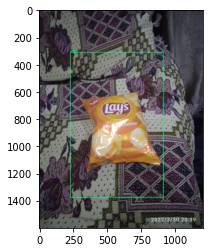

In [ ]:
img = cv2.imread("2t.jpeg")
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
cap = cv2.VideoCapture(0)

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

[ WARN:0@277.695] global /io/opencv/modules/videoio/src/cap_v4l.cpp (889) open VIDEOIO(V4L2:/dev/video0): can't open camera by index


In [ ]:
!zip -r tf.zip Tensorflow

  adding: Tensorflow/ (stored 0%)
  adding: Tensorflow/scripts/ (stored 0%)
  adding: Tensorflow/scripts/generate_tfrecord.py (deflated 68%)
  adding: Tensorflow/scripts/.git/ (stored 0%)
  adding: Tensorflow/scripts/.git/HEAD (stored 0%)
  adding: Tensorflow/scripts/.git/description (deflated 14%)
  adding: Tensorflow/scripts/.git/index (deflated 10%)
  adding: Tensorflow/scripts/.git/objects/ (stored 0%)
  adding: Tensorflow/scripts/.git/objects/07/ (stored 0%)
  adding: Tensorflow/scripts/.git/objects/07/bf1b9178bb4e9e48ec2dae8ec89269a5c44e54 (stored 0%)
  adding: Tensorflow/scripts/.git/objects/07/d3e8d86415fa96ac86ac3c72cf999eac96b74b (stored 0%)
  adding: Tensorflow/scripts/.git/objects/info/ (stored 0%)
  adding: Tensorflow/scripts/.git/objects/ca/ (stored 0%)
  adding: Tensorflow/scripts/.git/objects/ca/ad456d8bd86613a9aa74ccb6e934862c8e584a (stored 0%)
  adding: Tensorflow/scripts/.git/objects/pack/ (stored 0%)
  adding: Tensorflow/scripts/.git/hooks/ (stored 0%)
  adding: Ten

  adding: Tensorflow/models/official/legacy/transformer/transformer_test.py (deflated 65%)
  adding: Tensorflow/models/official/legacy/transformer/ffn_layer.py (deflated 59%)
  adding: Tensorflow/models/official/legacy/transformer/data_download.py (deflated 68%)
  adding: Tensorflow/models/official/legacy/transformer/README.md (deflated 62%)
  adding: Tensorflow/models/official/legacy/transformer/model_params.py (deflated 57%)
  adding: Tensorflow/models/official/legacy/transformer/embedding_layer.py (deflated 61%)
  adding: Tensorflow/models/official/legacy/transformer/__init__.py (deflated 37%)
  adding: Tensorflow/models/official/legacy/transformer/model_utils.py (deflated 60%)
  adding: Tensorflow/models/official/legacy/transformer/compute_bleu.py (deflated 59%)
  adding: Tensorflow/models/official/legacy/transformer/transformer_main.py (deflated 72%)
  adding: Tensorflow/models/official/legacy/transformer/model_utils_test.py (deflated 58%)
  adding: Tensorflow/models/official/lega

  adding: Tensorflow/models/official/legacy/xlnet/preprocess_utils.py (deflated 61%)
  adding: Tensorflow/models/official/legacy/xlnet/run_squad.py (deflated 71%)
  adding: Tensorflow/models/official/legacy/xlnet/common_flags.py (deflated 66%)
  adding: Tensorflow/models/official/legacy/xlnet/__init__.py (deflated 37%)
  adding: Tensorflow/models/official/legacy/xlnet/optimization.py (deflated 65%)
  adding: Tensorflow/models/official/legacy/xlnet/preprocess_pretrain_data.py (deflated 72%)
  adding: Tensorflow/models/official/legacy/xlnet/training_utils.py (deflated 68%)
  adding: Tensorflow/models/official/legacy/xlnet/xlnet_config.py (deflated 64%)
  adding: Tensorflow/models/official/legacy/xlnet/data_utils.py (deflated 76%)
  adding: Tensorflow/models/official/legacy/xlnet/preprocess_classification_data.py (deflated 74%)
  adding: Tensorflow/models/official/legacy/xlnet/preprocess_squad_data.py (deflated 64%)
  adding: Tensorflow/models/official/legacy/xlnet/run_classifier.py (defl

  adding: Tensorflow/models/official/modeling/optimization/optimizer_factory_test.py (deflated 85%)
  adding: Tensorflow/models/official/modeling/optimization/slide_optimizer.py (deflated 38%)
  adding: Tensorflow/models/official/modeling/optimization/ema_optimizer.py (deflated 68%)
  adding: Tensorflow/models/official/modeling/optimization/lars_optimizer.py (deflated 67%)
  adding: Tensorflow/models/official/modeling/optimization/__init__.py (deflated 55%)
  adding: Tensorflow/models/official/modeling/optimization/adafactor_optimizer.py (deflated 39%)
  adding: Tensorflow/models/official/modeling/optimization/lr_schedule_test.py (deflated 69%)
  adding: Tensorflow/models/official/modeling/optimization/lr_schedule.py (deflated 79%)
  adding: Tensorflow/models/official/modeling/optimization/configs/ (stored 0%)
  adding: Tensorflow/models/official/modeling/optimization/configs/__init__.py (deflated 37%)
  adding: Tensorflow/models/official/modeling/optimization/configs/optimizer_config.

  adding: Tensorflow/models/official/projects/movinet/configs/__init__.py (deflated 37%)
  adding: Tensorflow/models/official/projects/movinet/configs/yaml/ (stored 0%)
  adding: Tensorflow/models/official/projects/movinet/configs/yaml/movinet_a3_stream_k600_8x8.yaml (deflated 57%)
  adding: Tensorflow/models/official/projects/movinet/configs/yaml/movinet_a2_stream_k600_8x8.yaml (deflated 57%)
  adding: Tensorflow/models/official/projects/movinet/configs/yaml/movinet_a1_stream_k600_8x8.yaml (deflated 57%)
  adding: Tensorflow/models/official/projects/movinet/configs/yaml/movinet_a3_k600_8x8.yaml (deflated 56%)
  adding: Tensorflow/models/official/projects/movinet/configs/yaml/movinet_a1_k600_8x8.yaml (deflated 57%)
  adding: Tensorflow/models/official/projects/movinet/configs/yaml/movinet_a5_k600_8x8.yaml (deflated 56%)
  adding: Tensorflow/models/official/projects/movinet/configs/yaml/movinet_a0_k600_cpu_local.yaml (deflated 57%)
  adding: Tensorflow/models/official/projects/movinet/c

  adding: Tensorflow/models/official/projects/edgetpu/vision/README.md (deflated 75%)
  adding: Tensorflow/models/official/projects/edgetpu/vision/modeling/ (stored 0%)
  adding: Tensorflow/models/official/projects/edgetpu/vision/modeling/mobilenet_edgetpu_v1_model.py (deflated 63%)
  adding: Tensorflow/models/official/projects/edgetpu/vision/modeling/__init__.py (deflated 37%)
  adding: Tensorflow/models/official/projects/edgetpu/vision/modeling/mobilenet_edgetpu_v1_model_test.py (deflated 76%)
  adding: Tensorflow/models/official/projects/edgetpu/vision/modeling/custom_layers_test.py (deflated 73%)
  adding: Tensorflow/models/official/projects/edgetpu/vision/modeling/heads/ (stored 0%)
  adding: Tensorflow/models/official/projects/edgetpu/vision/modeling/heads/bifpn_head.py (deflated 76%)
  adding: Tensorflow/models/official/projects/edgetpu/vision/modeling/heads/__init__.py (deflated 37%)
  adding: Tensorflow/models/official/projects/edgetpu/vision/modeling/mobilenet_edgetpu_v1_mode

  adding: Tensorflow/models/official/projects/detr/tasks/detection_test.py (deflated 64%)
  adding: Tensorflow/models/official/projects/detr/tasks/detection.py (deflated 71%)
  adding: Tensorflow/models/official/projects/detr/configs/ (stored 0%)
  adding: Tensorflow/models/official/projects/detr/configs/detr.py (deflated 61%)
  adding: Tensorflow/models/official/projects/detr/configs/detr_test.py (deflated 50%)
  adding: Tensorflow/models/official/projects/labse/ (stored 0%)
  adding: Tensorflow/models/official/projects/labse/export_tfhub_test.py (deflated 63%)
  adding: Tensorflow/models/official/projects/labse/README.md (deflated 57%)
  adding: Tensorflow/models/official/projects/labse/config_labse.py (deflated 61%)
  adding: Tensorflow/models/official/projects/labse/experiments/ (stored 0%)
  adding: Tensorflow/models/official/projects/labse/experiments/labse_base.yaml (deflated 67%)
  adding: Tensorflow/models/official/projects/labse/experiments/labse_bert_base.yaml (deflated 52%)

  adding: Tensorflow/models/official/projects/bigbird/stateless_dropout.py (deflated 57%)
  adding: Tensorflow/models/official/projects/bigbird/experiments/ (stored 0%)
  adding: Tensorflow/models/official/projects/bigbird/experiments/glue_mnli_matched.yaml (deflated 60%)
  adding: Tensorflow/models/official/projects/bigbird/experiments/squad_v1.yaml (deflated 59%)
  adding: Tensorflow/models/official/projects/bigbird/__init__.py (deflated 37%)
  adding: Tensorflow/models/official/projects/bigbird/encoder_test.py (deflated 62%)
  adding: Tensorflow/models/official/projects/bigbird/encoder.py (deflated 69%)
  adding: Tensorflow/models/official/projects/bigbird/experiment_configs.py (deflated 73%)
  adding: Tensorflow/models/official/projects/qat/ (stored 0%)
  adding: Tensorflow/models/official/projects/qat/vision/ (stored 0%)
  adding: Tensorflow/models/official/projects/qat/vision/quantization/ (stored 0%)
  adding: Tensorflow/models/official/projects/qat/vision/quantization/configs.p

  adding: Tensorflow/models/official/projects/triviaqa/evaluate.py (deflated 48%)
  adding: Tensorflow/models/official/projects/triviaqa/inputs.py (deflated 75%)
  adding: Tensorflow/models/official/projects/triviaqa/predict.py (deflated 65%)
  adding: Tensorflow/models/official/projects/triviaqa/dataset.py (deflated 74%)
  adding: Tensorflow/models/official/projects/triviaqa/evaluation.py (deflated 69%)
  adding: Tensorflow/models/official/projects/mobilebert/ (stored 0%)
  adding: Tensorflow/models/official/projects/mobilebert/distillation.py (deflated 75%)
  adding: Tensorflow/models/official/projects/mobilebert/README.md (deflated 65%)
  adding: Tensorflow/models/official/projects/mobilebert/experiments/ (stored 0%)
  adding: Tensorflow/models/official/projects/mobilebert/experiments/mobilebert_distillation_en_uncased.yaml (deflated 71%)
  adding: Tensorflow/models/official/projects/mobilebert/experiments/en_uncased_student.yaml (deflated 56%)
  adding: Tensorflow/models/official/p

  adding: Tensorflow/models/official/projects/assemblenet/experiment/ucf101_assemblenet_tpu.yaml (deflated 56%)
  adding: Tensorflow/models/official/projects/assemblenet/train_test.py (deflated 60%)
  adding: Tensorflow/models/official/projects/assemblenet/configs/ (stored 0%)
  adding: Tensorflow/models/official/projects/assemblenet/configs/assemblenet.py (deflated 68%)
  adding: Tensorflow/models/official/projects/assemblenet/configs/assemblenet_test.py (deflated 57%)
  adding: Tensorflow/models/official/projects/token_dropping/ (stored 0%)
  adding: Tensorflow/models/official/projects/token_dropping/README.md (deflated 58%)
  adding: Tensorflow/models/official/projects/token_dropping/bert_en_uncased_base_token_drop.yaml (deflated 55%)
  adding: Tensorflow/models/official/projects/token_dropping/train.py (deflated 56%)
  adding: Tensorflow/models/official/projects/token_dropping/wiki_books_pretrain_sequence_pack.yaml (deflated 66%)
  adding: Tensorflow/models/official/projects/token_

  adding: Tensorflow/models/official/projects/volumetric_models/tasks/semantic_segmentation_3d_test.py (deflated 62%)
  adding: Tensorflow/models/official/projects/volumetric_models/tasks/semantic_segmentation_3d.py (deflated 70%)
  adding: Tensorflow/models/official/projects/volumetric_models/serving/ (stored 0%)
  adding: Tensorflow/models/official/projects/volumetric_models/serving/semantic_segmentation_3d_test.py (deflated 63%)
  adding: Tensorflow/models/official/projects/volumetric_models/serving/export_saved_model.py (deflated 62%)
  adding: Tensorflow/models/official/projects/volumetric_models/serving/semantic_segmentation_3d.py (deflated 52%)
  adding: Tensorflow/models/official/projects/volumetric_models/registry_imports.py (deflated 49%)
  adding: Tensorflow/models/official/projects/volumetric_models/configs/ (stored 0%)
  adding: Tensorflow/models/official/projects/volumetric_models/configs/decoders.py (deflated 51%)
  adding: Tensorflow/models/official/projects/volumetric_

  adding: Tensorflow/models/official/nlp/modeling/layers/mat_mul_with_margin.py (deflated 54%)
  adding: Tensorflow/models/official/nlp/modeling/layers/mobile_bert_layers_test.py (deflated 77%)
  adding: Tensorflow/models/official/nlp/modeling/layers/tn_transformer_expand_condense.py (deflated 75%)
  adding: Tensorflow/models/official/nlp/modeling/layers/transformer_test.py (deflated 70%)
  adding: Tensorflow/models/official/nlp/modeling/layers/text_layers.py (deflated 76%)
  adding: Tensorflow/models/official/nlp/modeling/layers/gated_feedforward.py (deflated 72%)
  adding: Tensorflow/models/official/nlp/modeling/layers/transformer_encoder_block_test.py (deflated 87%)
  adding: Tensorflow/models/official/nlp/modeling/layers/routing.py (deflated 67%)
  adding: Tensorflow/models/official/nlp/modeling/layers/README.md (deflated 65%)
  adding: Tensorflow/models/official/nlp/modeling/layers/tn_transformer_test.py (deflated 81%)
  adding: Tensorflow/models/official/nlp/modeling/layers/posit

  adding: Tensorflow/models/official/nlp/data/question_answering_dataloader.py (deflated 62%)
  adding: Tensorflow/models/official/nlp/data/dual_encoder_dataloader_test.py (deflated 70%)
  adding: Tensorflow/models/official/nlp/data/sentence_prediction_dataloader_test.py (deflated 80%)
  adding: Tensorflow/models/official/nlp/data/tagging_data_lib.py (deflated 72%)
  adding: Tensorflow/models/official/nlp/data/sentence_prediction_dataloader.py (deflated 72%)
  adding: Tensorflow/models/official/nlp/data/tagging_dataloader.py (deflated 62%)
  adding: Tensorflow/models/official/nlp/data/README.md (deflated 32%)
  adding: Tensorflow/models/official/nlp/data/create_pretraining_data.py (deflated 69%)
  adding: Tensorflow/models/official/nlp/data/tagging_data_lib_test.py (deflated 63%)
  adding: Tensorflow/models/official/nlp/data/__init__.py (deflated 37%)
  adding: Tensorflow/models/official/nlp/data/create_xlnet_pretraining_data_test.py (deflated 73%)
  adding: Tensorflow/models/official/

  adding: Tensorflow/models/official/vision/modeling/video_classification_model.py (deflated 65%)
  adding: Tensorflow/models/official/vision/modeling/classification_model_test.py (deflated 73%)
  adding: Tensorflow/models/official/vision/modeling/factory.py (deflated 83%)
  adding: Tensorflow/models/official/vision/modeling/segmentation_model.py (deflated 59%)
  adding: Tensorflow/models/official/vision/modeling/__init__.py (deflated 46%)
  adding: Tensorflow/models/official/vision/modeling/factory_test.py (deflated 75%)
  adding: Tensorflow/models/official/vision/modeling/factory_3d.py (deflated 63%)
  adding: Tensorflow/models/official/vision/modeling/retinanet_model.py (deflated 71%)
  adding: Tensorflow/models/official/vision/modeling/segmentation_model_test.py (deflated 60%)
  adding: Tensorflow/models/official/vision/modeling/heads/ (stored 0%)
  adding: Tensorflow/models/official/vision/modeling/heads/instance_heads.py (deflated 82%)
  adding: Tensorflow/models/official/vision/

  adding: Tensorflow/models/official/vision/beta/projects/yolo/dataloaders/classification_input.py (deflated 69%)
  adding: Tensorflow/models/official/vision/beta/projects/yolo/dataloaders/__init__.py (deflated 37%)
  adding: Tensorflow/models/official/vision/beta/projects/yolo/dataloaders/tf_example_decoder.py (deflated 62%)
  adding: Tensorflow/models/official/vision/beta/projects/yolo/dataloaders/yolo_input.py (deflated 71%)
  adding: Tensorflow/models/official/vision/beta/projects/yolo/optimization/ (stored 0%)
  adding: Tensorflow/models/official/vision/beta/projects/yolo/optimization/__init__.py (deflated 51%)
  adding: Tensorflow/models/official/vision/beta/projects/yolo/optimization/sgd_torch.py (deflated 70%)
  adding: Tensorflow/models/official/vision/beta/projects/yolo/optimization/configs/ (stored 0%)
  adding: Tensorflow/models/official/vision/beta/projects/yolo/optimization/configs/__init__.py (deflated 37%)
  adding: Tensorflow/models/official/vision/beta/projects/yolo/o

  adding: Tensorflow/models/official/vision/beta/projects/simclr/multitask_train.py (deflated 58%)
  adding: Tensorflow/models/official/vision/beta/projects/simclr/README.md (deflated 57%)
  adding: Tensorflow/models/official/vision/beta/projects/simclr/modeling/ (stored 0%)
  adding: Tensorflow/models/official/vision/beta/projects/simclr/modeling/multitask_model_test.py (deflated 53%)
  adding: Tensorflow/models/official/vision/beta/projects/simclr/modeling/multitask_model.py (deflated 66%)
  adding: Tensorflow/models/official/vision/beta/projects/simclr/modeling/simclr_model.py (deflated 66%)
  adding: Tensorflow/models/official/vision/beta/projects/simclr/modeling/simclr_model_test.py (deflated 57%)
  adding: Tensorflow/models/official/vision/beta/projects/simclr/modeling/layers/ (stored 0%)
  adding: Tensorflow/models/official/vision/beta/projects/simclr/modeling/layers/nn_blocks.py (deflated 65%)
  adding: Tensorflow/models/official/vision/beta/projects/simclr/modeling/layers/nn_b

  adding: Tensorflow/models/official/vision/beta/projects/centernet/modeling/layers/cn_nn_blocks_test.py (deflated 66%)
  adding: Tensorflow/models/official/vision/beta/projects/centernet/modeling/layers/cn_nn_blocks.py (deflated 74%)
  adding: Tensorflow/models/official/vision/beta/projects/centernet/modeling/layers/detection_generator.py (deflated 71%)
  adding: Tensorflow/models/official/vision/beta/projects/centernet/train.py (deflated 55%)
  adding: Tensorflow/models/official/vision/beta/projects/centernet/ops/ (stored 0%)
  adding: Tensorflow/models/official/vision/beta/projects/centernet/ops/target_assigner.py (deflated 70%)
  adding: Tensorflow/models/official/vision/beta/projects/centernet/ops/nms_ops.py (deflated 65%)
  adding: Tensorflow/models/official/vision/beta/projects/centernet/ops/target_assigner_test.py (deflated 75%)
  adding: Tensorflow/models/official/vision/beta/projects/centernet/ops/__init__.py (deflated 37%)
  adding: Tensorflow/models/official/vision/beta/pro

  adding: Tensorflow/models/official/vision/serving/export_base_v2.py (deflated 59%)
  adding: Tensorflow/models/official/vision/serving/detection.py (deflated 68%)
  adding: Tensorflow/models/official/vision/serving/export_saved_model.py (deflated 61%)
  adding: Tensorflow/models/official/vision/serving/export_tflite.py (deflated 59%)
  adding: Tensorflow/models/official/vision/MODEL_GARDEN.md (deflated 78%)
  adding: Tensorflow/models/official/vision/data/ (stored 0%)
  adding: Tensorflow/models/official/vision/data/process_coco_few_shot_json_files.py (deflated 58%)
  adding: Tensorflow/models/official/vision/data/create_coco_tf_record.py (deflated 76%)
  adding: Tensorflow/models/official/vision/data/__init__.py (deflated 37%)
  adding: Tensorflow/models/official/vision/data/process_coco_few_shot.sh (deflated 72%)
  adding: Tensorflow/models/official/vision/data/process_coco_panoptic.sh (deflated 73%)
  adding: Tensorflow/models/official/vision/data/tfrecord_lib_test.py (deflated 61

  adding: Tensorflow/models/official/vision/configs/experiments/video_classification/k600_3d-resnet50g_tpu.yaml (deflated 68%)
  adding: Tensorflow/models/official/vision/configs/experiments/video_classification/k600_slowonly8x8_tpu.yaml (deflated 69%)
  adding: Tensorflow/models/official/vision/configs/experiments/video_classification/k400_3d-resnet50_tpu.yaml (deflated 69%)
  adding: Tensorflow/models/official/vision/configs/experiments/retinanet/ (stored 0%)
  adding: Tensorflow/models/official/vision/configs/experiments/retinanet/coco_spinenet190_tpu.yaml (deflated 55%)
  adding: Tensorflow/models/official/vision/configs/experiments/retinanet/resnet50fpn_coco_tpu4x4_benchmark.yaml (deflated 31%)
  adding: Tensorflow/models/official/vision/configs/experiments/retinanet/coco_spinenet49_tpu.yaml (deflated 53%)
  adding: Tensorflow/models/official/vision/configs/experiments/retinanet/coco_spinenet49s_mobile_tpu.yaml (deflated 55%)
  adding: Tensorflow/models/official/vision/configs/exp

  adding: Tensorflow/models/official/core/actions_test.py (deflated 68%)
  adding: Tensorflow/models/official/core/exp_factory.py (deflated 46%)
  adding: Tensorflow/models/official/core/input_reader.py (deflated 75%)
  adding: Tensorflow/models/official/core/task_factory.py (deflated 55%)
  adding: Tensorflow/models/official/core/config_definitions.py (deflated 64%)
  adding: Tensorflow/models/official/recommendation/ (stored 0%)
  adding: Tensorflow/models/official/recommendation/ncf_keras_main.py (deflated 70%)
  adding: Tensorflow/models/official/recommendation/data_pipeline.py (deflated 74%)
  adding: Tensorflow/models/official/recommendation/neumf_model.py (deflated 67%)
  adding: Tensorflow/models/official/recommendation/ncf_input_pipeline.py (deflated 68%)
  adding: Tensorflow/models/official/recommendation/README.md (deflated 58%)
  adding: Tensorflow/models/official/recommendation/run.sh (deflated 53%)
  adding: Tensorflow/models/official/recommendation/data_test.py (deflated

  adding: Tensorflow/models/.git/objects/pack/pack-e58b228a5b63f59c143e8223d7efd6bb82ff8d6f.pack (deflated 0%)
  adding: Tensorflow/models/.git/objects/pack/pack-e58b228a5b63f59c143e8223d7efd6bb82ff8d6f.idx (deflated 1%)
  adding: Tensorflow/models/.git/hooks/ (stored 0%)
  adding: Tensorflow/models/.git/hooks/pre-merge-commit.sample (deflated 39%)
  adding: Tensorflow/models/.git/hooks/pre-commit.sample (deflated 45%)
  adding: Tensorflow/models/.git/hooks/fsmonitor-watchman.sample (deflated 52%)
  adding: Tensorflow/models/.git/hooks/commit-msg.sample (deflated 44%)
  adding: Tensorflow/models/.git/hooks/pre-rebase.sample (deflated 59%)
  adding: Tensorflow/models/.git/hooks/pre-receive.sample (deflated 40%)
  adding: Tensorflow/models/.git/hooks/prepare-commit-msg.sample (deflated 50%)
  adding: Tensorflow/models/.git/hooks/update.sample (deflated 68%)
  adding: Tensorflow/models/.git/hooks/pre-push.sample (deflated 50%)
  adding: Tensorflow/models/.git/hooks/pre-applypatch.sample (

  adding: Tensorflow/models/research/lfads/synth_data/trained_itb/model-65000.meta (deflated 93%)
  adding: Tensorflow/models/research/lfads/synth_data/synthetic_data_utils.py (deflated 63%)
  adding: Tensorflow/models/research/lfads/synth_data/generate_itb_data.py (deflated 67%)
  adding: Tensorflow/models/research/lfads/synth_data/generate_labeled_rnn_data.py (deflated 65%)
  adding: Tensorflow/models/research/lfads/synth_data/generate_chaotic_rnn_data.py (deflated 63%)
  adding: Tensorflow/models/research/lfads/distributions.py (deflated 73%)
  adding: Tensorflow/models/research/lfads/plot_lfads.py (deflated 69%)
  adding: Tensorflow/models/research/lfads/lfads.py (deflated 78%)
  adding: Tensorflow/models/research/lfads/utils.py (deflated 71%)
  adding: Tensorflow/models/research/cvt_text/ (stored 0%)
  adding: Tensorflow/models/research/cvt_text/training/ (stored 0%)
  adding: Tensorflow/models/research/cvt_text/training/__init__.py (stored 0%)
  adding: Tensorflow/models/research

  adding: Tensorflow/models/research/slim/nets/nasnet/nasnet_utils_test.py (deflated 61%)
  adding: Tensorflow/models/research/slim/nets/nasnet/README.md (deflated 61%)
  adding: Tensorflow/models/research/slim/nets/nasnet/pnasnet.py (deflated 75%)
  adding: Tensorflow/models/research/slim/nets/nasnet/nasnet_utils.py (deflated 74%)
  adding: Tensorflow/models/research/slim/nets/nasnet/__init__.py (stored 0%)
  adding: Tensorflow/models/research/slim/nets/nasnet/nasnet_test.py (deflated 87%)
  adding: Tensorflow/models/research/slim/nets/nasnet/pnasnet_test.py (deflated 83%)
  adding: Tensorflow/models/research/slim/nets/nasnet/nasnet.py (deflated 81%)
  adding: Tensorflow/models/research/slim/nets/pix2pix_test.py (deflated 76%)
  adding: Tensorflow/models/research/slim/nets/alexnet.py (deflated 63%)
  adding: Tensorflow/models/research/slim/nets/resnet_v2_test.py (deflated 81%)
  adding: Tensorflow/models/research/slim/nets/s3dg.py (deflated 80%)
  adding: Tensorflow/models/research/sl

  adding: Tensorflow/models/research/cognitive_planning/viz_active_vision_dataset_main.py (deflated 69%)
  adding: Tensorflow/models/research/cognitive_planning/preprocessing/ (stored 0%)
  adding: Tensorflow/models/research/cognitive_planning/preprocessing/lenet_preprocessing.py (deflated 52%)
  adding: Tensorflow/models/research/cognitive_planning/preprocessing/inception_preprocessing.py (deflated 73%)
  adding: Tensorflow/models/research/cognitive_planning/preprocessing/__init__.py (stored 0%)
  adding: Tensorflow/models/research/cognitive_planning/preprocessing/vgg_preprocessing.py (deflated 73%)
  adding: Tensorflow/models/research/cognitive_planning/preprocessing/cifarnet_preprocessing.py (deflated 71%)
  adding: Tensorflow/models/research/cognitive_planning/preprocessing/preprocessing_factory.py (deflated 67%)
  adding: Tensorflow/models/research/cognitive_planning/BUILD (deflated 40%)
  adding: Tensorflow/models/research/cognitive_planning/label_map.txt (deflated 78%)
  adding:

  adding: Tensorflow/models/research/delf/delf/python/detect_to_retrieve/query_aggregation_config.pbtxt (deflated 32%)
  adding: Tensorflow/models/research/delf/delf/python/detect_to_retrieve/index_aggregation_config.pbtxt (deflated 34%)
  adding: Tensorflow/models/research/delf/delf/python/detect_to_retrieve/extract_aggregation.py (deflated 61%)
  adding: Tensorflow/models/research/delf/delf/python/detect_to_retrieve/extract_index_boxes_and_features.py (deflated 64%)
  adding: Tensorflow/models/research/delf/delf/python/detect_to_retrieve/extract_query_features.py (deflated 61%)
  adding: Tensorflow/models/research/delf/delf/python/detect_to_retrieve/boxes_and_features_extraction.py (deflated 67%)
  adding: Tensorflow/models/research/delf/delf/python/detect_to_retrieve/aggregation_extraction.py (deflated 68%)
  adding: Tensorflow/models/research/delf/delf/python/detect_to_retrieve/DETECT_TO_RETRIEVE_INSTRUCTIONS.md (deflated 73%)
  adding: Tensorflow/models/research/delf/delf/python/f

  adding: Tensorflow/models/research/nst_blogpost/wave_turtle.png (deflated 0%)
  adding: Tensorflow/models/research/nst_blogpost/Green_Sea_Turtle_grazing_seagrass.jpg (deflated 1%)
  adding: Tensorflow/models/research/nst_blogpost/4_Neural_Style_Transfer_with_Eager_Execution.ipynb (deflated 77%)
  adding: Tensorflow/models/research/seq_flow_lite/ (stored 0%)
  adding: Tensorflow/models/research/seq_flow_lite/input_fn_reader.py (deflated 59%)
  adding: Tensorflow/models/research/seq_flow_lite/README.md (deflated 56%)
  adding: Tensorflow/models/research/seq_flow_lite/metric_functions.py (deflated 57%)
  adding: Tensorflow/models/research/seq_flow_lite/BUILD (deflated 71%)
  adding: Tensorflow/models/research/seq_flow_lite/third_party/ (stored 0%)
  adding: Tensorflow/models/research/seq_flow_lite/third_party/android/ (stored 0%)
  adding: Tensorflow/models/research/seq_flow_lite/third_party/android/android.bzl.tpl (deflated 35%)
  adding: Tensorflow/models/research/seq_flow_lite/third_

  adding: Tensorflow/models/research/seq_flow_lite/utils/BUILD (deflated 55%)
  adding: Tensorflow/models/research/seq_flow_lite/utils/misc_utils.py (deflated 56%)
  adding: Tensorflow/models/research/seq_flow_lite/configs/ (stored 0%)
  adding: Tensorflow/models/research/seq_flow_lite/configs/go_emotion_prado.txt (deflated 53%)
  adding: Tensorflow/models/research/seq_flow_lite/configs/civil_comments_prado.txt (deflated 52%)
  adding: Tensorflow/models/research/seq_flow_lite/layers/ (stored 0%)
  adding: Tensorflow/models/research/seq_flow_lite/layers/base_layers.py (deflated 64%)
  adding: Tensorflow/models/research/seq_flow_lite/layers/misc_layers.py (deflated 64%)
  adding: Tensorflow/models/research/seq_flow_lite/layers/normalization_layers.py (deflated 70%)
  adding: Tensorflow/models/research/seq_flow_lite/layers/projection_layers.py (deflated 72%)
  adding: Tensorflow/models/research/seq_flow_lite/layers/dense_layers.py (deflated 68%)
  adding: Tensorflow/models/research/seq_fl

  adding: Tensorflow/models/research/efficient-hrl/context/rewards_functions.py (deflated 86%)
  adding: Tensorflow/models/research/efficient-hrl/context/configs/ (stored 0%)
  adding: Tensorflow/models/research/efficient-hrl/context/configs/ant_maze_img.gin (deflated 71%)
  adding: Tensorflow/models/research/efficient-hrl/context/configs/ant_block_maze.gin (deflated 69%)
  adding: Tensorflow/models/research/efficient-hrl/context/configs/hiro_repr.gin (deflated 43%)
  adding: Tensorflow/models/research/efficient-hrl/context/configs/default.gin (deflated 29%)
  adding: Tensorflow/models/research/efficient-hrl/context/configs/ant_fall_single.gin (deflated 68%)
  adding: Tensorflow/models/research/efficient-hrl/context/configs/ant_push_multi_img.gin (deflated 70%)
  adding: Tensorflow/models/research/efficient-hrl/context/configs/ant_block.gin (deflated 69%)
  adding: Tensorflow/models/research/efficient-hrl/context/configs/hiro_orig.gin (deflated 46%)
  adding: Tensorflow/models/research

  adding: Tensorflow/models/research/deeplab/evaluation/testdata/bird_gt.png (stored 0%)
  adding: Tensorflow/models/research/deeplab/evaluation/testdata/cat_pred_class.png (deflated 18%)
  adding: Tensorflow/models/research/deeplab/evaluation/testdata/cat_pred_instance.png (deflated 12%)
  adding: Tensorflow/models/research/deeplab/evaluation/testdata/team_gt_instance.png (deflated 1%)
  adding: Tensorflow/models/research/deeplab/evaluation/testdata/cat_gt.png (deflated 9%)
  adding: Tensorflow/models/research/deeplab/evaluation/testdata/coco_pred/ (stored 0%)
  adding: Tensorflow/models/research/deeplab/evaluation/testdata/coco_pred/cat.png (deflated 2%)
  adding: Tensorflow/models/research/deeplab/evaluation/testdata/coco_pred/team.png (deflated 0%)
  adding: Tensorflow/models/research/deeplab/evaluation/testdata/coco_pred/congress.png (deflated 12%)
  adding: Tensorflow/models/research/deeplab/evaluation/testdata/coco_pred/bird.png (deflated 0%)
  adding: Tensorflow/models/research

  adding: Tensorflow/models/research/lstm_object_detection/tflite/mobile_ssd_client.h (deflated 65%)
  adding: Tensorflow/models/research/lstm_object_detection/tflite/protos/ (stored 0%)
  adding: Tensorflow/models/research/lstm_object_detection/tflite/protos/labelmap.proto (deflated 52%)
  adding: Tensorflow/models/research/lstm_object_detection/tflite/protos/BUILD (deflated 78%)
  adding: Tensorflow/models/research/lstm_object_detection/tflite/protos/box_encodings.proto (deflated 67%)
  adding: Tensorflow/models/research/lstm_object_detection/tflite/protos/proto_config.asciipb (deflated 12%)
  adding: Tensorflow/models/research/lstm_object_detection/tflite/protos/anchor_generation_options.proto (deflated 56%)
  adding: Tensorflow/models/research/lstm_object_detection/tflite/protos/mobile_ssd_client_options.proto (deflated 60%)
  adding: Tensorflow/models/research/lstm_object_detection/tflite/protos/detections.proto (deflated 49%)
  adding: Tensorflow/models/research/lstm_object_detec

  adding: Tensorflow/models/research/object_detection/colab_tutorials/centernet_on_device.ipynb (deflated 78%)
  adding: Tensorflow/models/research/object_detection/colab_tutorials/inference_from_saved_model_tf2_colab.ipynb (deflated 74%)
  adding: Tensorflow/models/research/object_detection/colab_tutorials/eager_few_shot_od_training_tflite.ipynb (deflated 74%)
  adding: Tensorflow/models/research/object_detection/colab_tutorials/inference_tf2_colab.ipynb (deflated 74%)
  adding: Tensorflow/models/research/object_detection/colab_tutorials/object_detection_tutorial.ipynb (deflated 76%)
  adding: Tensorflow/models/research/object_detection/colab_tutorials/generate_ssd_anchor_box_aspect_ratios_using_k_means_clustering.ipynb (deflated 72%)
  adding: Tensorflow/models/research/object_detection/colab_tutorials/context_rcnn_tutorial.ipynb (deflated 30%)
  adding: Tensorflow/models/research/object_detection/colab_tutorials/deepmac_colab.ipynb (deflated 72%)
  adding: Tensorflow/models/research

  adding: Tensorflow/models/research/object_detection/builders/preprocessor_builder_test.py (deflated 89%)
  adding: Tensorflow/models/research/object_detection/builders/box_predictor_builder.py (deflated 88%)
  adding: Tensorflow/models/research/object_detection/builders/hyperparams_builder.py (deflated 75%)
  adding: Tensorflow/models/research/object_detection/builders/region_similarity_calculator_builder.py (deflated 67%)
  adding: Tensorflow/models/research/object_detection/builders/model_builder_tf1_test.py (deflated 58%)
  adding: Tensorflow/models/research/object_detection/builders/model_builder_test.py (deflated 80%)
  adding: Tensorflow/models/research/object_detection/builders/input_reader_builder_tf1_test.py (deflated 80%)
  adding: Tensorflow/models/research/object_detection/builders/anchor_generator_builder_test.py (deflated 85%)
  adding: Tensorflow/models/research/object_detection/builders/matcher_builder_test.py (deflated 74%)
  adding: Tensorflow/models/research/object

  adding: Tensorflow/models/research/object_detection/test_images/ducky/train/robertducky1.jpg (deflated 0%)
  adding: Tensorflow/models/research/object_detection/test_images/ducky/test/ (stored 0%)
  adding: Tensorflow/models/research/object_detection/test_images/ducky/test/out36.jpg (deflated 1%)
  adding: Tensorflow/models/research/object_detection/test_images/ducky/test/out27.jpg (deflated 1%)
  adding: Tensorflow/models/research/object_detection/test_images/ducky/test/out37.jpg (deflated 1%)
  adding: Tensorflow/models/research/object_detection/test_images/ducky/test/out14.jpg (deflated 1%)
  adding: Tensorflow/models/research/object_detection/test_images/ducky/test/out12.jpg (deflated 1%)
  adding: Tensorflow/models/research/object_detection/test_images/ducky/test/out8.jpg (deflated 0%)
  adding: Tensorflow/models/research/object_detection/test_images/ducky/test/out6.jpg (deflated 1%)
  adding: Tensorflow/models/research/object_detection/test_images/ducky/test/out40.jpg (deflated

  adding: Tensorflow/models/research/object_detection/dockerfiles/tf2/Dockerfile (deflated 50%)
  adding: Tensorflow/models/research/object_detection/dockerfiles/tf1/ (stored 0%)
  adding: Tensorflow/models/research/object_detection/dockerfiles/tf1/README.md (deflated 30%)
  adding: Tensorflow/models/research/object_detection/dockerfiles/tf1/Dockerfile (deflated 50%)
  adding: Tensorflow/models/research/object_detection/meta_architectures/ (stored 0%)
  adding: Tensorflow/models/research/object_detection/meta_architectures/rfcn_meta_arch.py (deflated 72%)
  adding: Tensorflow/models/research/object_detection/meta_architectures/context_rcnn_lib.py (deflated 74%)
  adding: Tensorflow/models/research/object_detection/meta_architectures/ssd_meta_arch_test_lib.py (deflated 70%)
  adding: Tensorflow/models/research/object_detection/meta_architectures/center_net_meta_arch_tf2_test.py (deflated 86%)
  adding: Tensorflow/models/research/object_detection/meta_architectures/ssd_meta_arch_test.py 

  adding: Tensorflow/models/research/object_detection/protos/preprocessor_pb2.py (deflated 92%)
  adding: Tensorflow/models/research/object_detection/protos/keypoint_box_coder_pb2.py (deflated 76%)
  adding: Tensorflow/models/research/object_detection/protos/bipartite_matcher_pb2.py (deflated 64%)
  adding: Tensorflow/models/research/object_detection/protos/pipeline_pb2.py (deflated 80%)
  adding: Tensorflow/models/research/object_detection/protos/calibration_pb2.py (deflated 89%)
  adding: Tensorflow/models/research/object_detection/protos/ssd_anchor_generator_pb2.py (deflated 83%)
  adding: Tensorflow/models/research/object_detection/protos/train.proto (deflated 64%)
  adding: Tensorflow/models/research/object_detection/protos/center_net_pb2.py (deflated 91%)
  adding: Tensorflow/models/research/object_detection/protos/target_assigner.proto (deflated 52%)
  adding: Tensorflow/models/research/object_detection/protos/train_pb2.py (deflated 86%)
  adding: Tensorflow/models/research/obje

  adding: Tensorflow/models/research/object_detection/samples/configs/faster_rcnn_inception_resnet_v2_atrous_cosine_lr_coco.config (deflated 64%)
  adding: Tensorflow/models/research/object_detection/samples/configs/mask_rcnn_resnet101_pets.config (deflated 66%)
  adding: Tensorflow/models/research/object_detection/samples/configs/ssd_inception_v2_coco.config (deflated 66%)
  adding: Tensorflow/models/research/object_detection/samples/configs/faster_rcnn_inception_v2_coco.config (deflated 65%)
  adding: Tensorflow/models/research/object_detection/samples/configs/faster_rcnn_inception_resnet_v2_atrous_oid.config (deflated 65%)
  adding: Tensorflow/models/research/object_detection/samples/configs/faster_rcnn_inception_resnet_v2_atrous_coco.config (deflated 65%)
  adding: Tensorflow/models/research/object_detection/samples/configs/faster_rcnn_resnet101_fgvc.config (deflated 66%)
  adding: Tensorflow/models/research/object_detection/samples/configs/faster_rcnn_resnet50_pets.config (deflate

  adding: Tensorflow/models/research/object_detection/models/faster_rcnn_mobilenet_v1_feature_extractor.py (deflated 72%)
  adding: Tensorflow/models/research/object_detection/models/ssd_mobilenet_v1_feature_extractor_tf2_test.py (deflated 80%)
  adding: Tensorflow/models/research/object_detection/models/keras_models/ (stored 0%)
  adding: Tensorflow/models/research/object_detection/models/keras_models/hourglass_network.py (deflated 79%)
  adding: Tensorflow/models/research/object_detection/models/keras_models/hourglass_network_tf2_test.py (deflated 78%)
  adding: Tensorflow/models/research/object_detection/models/keras_models/mobilenet_v1_tf2_test.py (deflated 75%)
  adding: Tensorflow/models/research/object_detection/models/keras_models/base_models/ (stored 0%)
  adding: Tensorflow/models/research/object_detection/models/keras_models/base_models/original_mobilenet_v2.py (deflated 73%)
  adding: Tensorflow/models/research/object_detection/models/keras_models/__init__.py (stored 0%)
  

  adding: Tensorflow/models/research/object_detection/data/pet_label_map.pbtxt (deflated 71%)
  adding: Tensorflow/models/research/object_detection/data/fgvc_2854_classes_label_map.pbtxt (deflated 77%)
  adding: Tensorflow/models/research/object_detection/data/mscoco_minival_ids.txt (deflated 52%)
  adding: Tensorflow/models/research/object_detection/data/oid_object_detection_challenge_500_label_map.pbtxt (deflated 79%)
  adding: Tensorflow/models/research/object_detection/data/pascal_label_map.pbtxt (deflated 73%)
  adding: Tensorflow/models/research/object_detection/data/mscoco_complete_label_map.pbtxt (deflated 79%)
  adding: Tensorflow/models/research/object_detection/data/face_person_with_keypoints_label_map.pbtxt (deflated 77%)
  adding: Tensorflow/models/research/object_detection/data/oid_bbox_trainable_label_map.pbtxt (deflated 79%)
  adding: Tensorflow/models/research/object_detection/data/kitti_label_map.pbtxt (deflated 29%)
  adding: Tensorflow/models/research/object_detecti

  adding: Tensorflow/models/research/object_detection/configs/tf2/ssd_resnet152_v1_fpn_640x640_coco17_tpu-8.config (deflated 65%)
  adding: Tensorflow/models/research/object_detection/configs/tf2/centernet_resnet50_v1_fpn_512x512_kpts_coco17_tpu-8.config (deflated 78%)
  adding: Tensorflow/models/research/object_detection/configs/tf2/ssd_efficientdet_d0_512x512_coco17_tpu-8.config (deflated 66%)
  adding: Tensorflow/models/research/object_detection/configs/tf2/centernet_resnet101_v1_fpn_512x512_coco17_tpu-8.config (deflated 63%)
  adding: Tensorflow/models/research/object_detection/configs/tf2/faster_rcnn_resnet50_v1_640x640_coco17_tpu-8.config (deflated 64%)
  adding: Tensorflow/models/research/object_detection/configs/tf2/ssd_efficientdet_d7_1536x1536_coco17_tpu-32.config (deflated 65%)
  adding: Tensorflow/models/research/object_detection/configs/tf2/center_net_deepmac_1024x1024_non_voc_only_tpu-128.config (deflated 68%)
  adding: Tensorflow/models/research/object_detection/configs/

  adding: Tensorflow/models/research/object_detection/predictors/mask_rcnn_box_predictor.py (deflated 65%)
  adding: Tensorflow/models/research/object_detection/predictors/mask_rcnn_keras_box_predictor.py (deflated 63%)
  adding: Tensorflow/models/research/object_detection/predictors/convolutional_box_predictor_tf1_test.py (deflated 91%)
  adding: Tensorflow/models/research/object_detection/predictors/heads/ (stored 0%)
  adding: Tensorflow/models/research/object_detection/predictors/heads/keras_mask_head_tf2_test.py (deflated 84%)
  adding: Tensorflow/models/research/object_detection/predictors/heads/keras_class_head_tf2_test.py (deflated 82%)
  adding: Tensorflow/models/research/object_detection/predictors/heads/keypoint_head_tf1_test.py (deflated 56%)
  adding: Tensorflow/models/research/object_detection/predictors/heads/__init__.py (stored 0%)
  adding: Tensorflow/models/research/object_detection/predictors/heads/keras_class_head.py (deflated 80%)
  adding: Tensorflow/models/resear

  adding: Tensorflow/models/research/build/lib/deployment/model_deploy_test.py (deflated 88%)
  adding: Tensorflow/models/research/build/lib/nets/ (stored 0%)
  adding: Tensorflow/models/research/build/lib/nets/vgg.py (deflated 82%)
  adding: Tensorflow/models/research/build/lib/nets/resnet_v1_test.py (deflated 83%)
  adding: Tensorflow/models/research/build/lib/nets/vgg_test.py (deflated 91%)
  adding: Tensorflow/models/research/build/lib/nets/nets_factory_test.py (deflated 72%)
  adding: Tensorflow/models/research/build/lib/nets/inception_v4_test.py (deflated 82%)
  adding: Tensorflow/models/research/build/lib/nets/i3d.py (deflated 62%)
  adding: Tensorflow/models/research/build/lib/nets/inception_v1.py (deflated 83%)
  adding: Tensorflow/models/research/build/lib/nets/dcgan_test.py (deflated 67%)
  adding: Tensorflow/models/research/build/lib/nets/inception_utils.py (deflated 59%)
  adding: Tensorflow/models/research/build/lib/nets/inception_v1_test.py (deflated 80%)
  adding: Tenso

  adding: Tensorflow/models/research/build/lib/object_detection/dataset_tools/create_oid_tf_record.py (deflated 63%)
  adding: Tensorflow/models/research/build/lib/object_detection/dataset_tools/__init__.py (stored 0%)
  adding: Tensorflow/models/research/build/lib/object_detection/dataset_tools/create_coco_tf_record_test.py (deflated 84%)
  adding: Tensorflow/models/research/build/lib/object_detection/dataset_tools/densepose/ (stored 0%)
  adding: Tensorflow/models/research/build/lib/object_detection/dataset_tools/densepose/UV_symmetry_transforms.mat (deflated 96%)
  adding: Tensorflow/models/research/build/lib/object_detection/dataset_tools/seq_example_util_test.py (deflated 87%)
  adding: Tensorflow/models/research/build/lib/object_detection/dataset_tools/context_rcnn/ (stored 0%)
  adding: Tensorflow/models/research/build/lib/object_detection/dataset_tools/context_rcnn/generate_detection_data.py (deflated 72%)
  adding: Tensorflow/models/research/build/lib/object_detection/dataset_

  adding: Tensorflow/models/research/build/lib/object_detection/builders/hyperparams_builder_test.py (deflated 92%)
  adding: Tensorflow/models/research/build/lib/object_detection/builders/decoder_builder.py (deflated 67%)
  adding: Tensorflow/models/research/build/lib/object_detection/builders/optimizer_builder_tf2_test.py (deflated 71%)
  adding: Tensorflow/models/research/build/lib/object_detection/builders/image_resizer_builder_test.py (deflated 82%)
  adding: Tensorflow/models/research/build/lib/object_detection/builders/box_predictor_builder_test.py (deflated 90%)
  adding: Tensorflow/models/research/build/lib/object_detection/builders/target_assigner_builder.py (deflated 60%)
  adding: Tensorflow/models/research/build/lib/object_detection/builders/region_similarity_calculator_builder_test.py (deflated 72%)
  adding: Tensorflow/models/research/build/lib/object_detection/builders/post_processing_builder_test.py (deflated 82%)
  adding: Tensorflow/models/research/build/lib/object_d

  adding: Tensorflow/models/research/build/lib/object_detection/test_images/ducky/test/out24.jpg (deflated 1%)
  adding: Tensorflow/models/research/build/lib/object_detection/test_images/ducky/test/out49.jpg (deflated 0%)
  adding: Tensorflow/models/research/build/lib/object_detection/test_images/ducky/test/out2.jpg (deflated 0%)
  adding: Tensorflow/models/research/build/lib/object_detection/test_images/ducky/test/out44.jpg (deflated 0%)
  adding: Tensorflow/models/research/build/lib/object_detection/test_images/ducky/test/out25.jpg (deflated 1%)
  adding: Tensorflow/models/research/build/lib/object_detection/test_images/ducky/test/out17.jpg (deflated 1%)
  adding: Tensorflow/models/research/build/lib/object_detection/test_images/ducky/test/out32.jpg (deflated 1%)
  adding: Tensorflow/models/research/build/lib/object_detection/test_images/ducky/test/out42.jpg (deflated 0%)
  adding: Tensorflow/models/research/build/lib/object_detection/test_images/ducky/test/out21.jpg (deflated 1%)
  

  adding: Tensorflow/models/research/build/lib/object_detection/meta_architectures/ssd_meta_arch_test.py (deflated 86%)
  adding: Tensorflow/models/research/build/lib/object_detection/meta_architectures/context_rcnn_lib_tf2.py (deflated 72%)
  adding: Tensorflow/models/research/build/lib/object_detection/meta_architectures/__init__.py (stored 0%)
  adding: Tensorflow/models/research/build/lib/object_detection/meta_architectures/faster_rcnn_meta_arch.py (deflated 81%)
  adding: Tensorflow/models/research/build/lib/object_detection/meta_architectures/context_rcnn_meta_arch_test.py (deflated 78%)
  adding: Tensorflow/models/research/build/lib/object_detection/meta_architectures/rfcn_meta_arch_test.py (deflated 61%)
  adding: Tensorflow/models/research/build/lib/object_detection/meta_architectures/context_rcnn_meta_arch.py (deflated 78%)
  adding: Tensorflow/models/research/build/lib/object_detection/meta_architectures/context_rcnn_lib_tf1_test.py (deflated 78%)
  adding: Tensorflow/models

  adding: Tensorflow/models/research/build/lib/object_detection/protos/ssd_anchor_generator_pb2.py (deflated 83%)
  adding: Tensorflow/models/research/build/lib/object_detection/protos/train.proto (deflated 64%)
  adding: Tensorflow/models/research/build/lib/object_detection/protos/center_net_pb2.py (deflated 91%)
  adding: Tensorflow/models/research/build/lib/object_detection/protos/target_assigner.proto (deflated 52%)
  adding: Tensorflow/models/research/build/lib/object_detection/protos/train_pb2.py (deflated 86%)
  adding: Tensorflow/models/research/build/lib/object_detection/protos/box_predictor.proto (deflated 74%)
  adding: Tensorflow/models/research/build/lib/object_detection/protos/preprocessor.proto (deflated 78%)
  adding: Tensorflow/models/research/build/lib/object_detection/protos/string_int_label_map_pb2.py (deflated 83%)
  adding: Tensorflow/models/research/build/lib/object_detection/protos/hyperparams_pb2.py (deflated 89%)
  adding: Tensorflow/models/research/build/lib/

  adding: Tensorflow/models/research/build/lib/object_detection/samples/configs/faster_rcnn_resnet50_pets.config (deflated 64%)
  adding: Tensorflow/models/research/build/lib/object_detection/samples/configs/mask_rcnn_inception_v2_coco.config (deflated 67%)
  adding: Tensorflow/models/research/build/lib/object_detection/samples/configs/ssd_mobilenet_v2_mnasfpn_shared_box_predictor_320x320_coco_sync.config (deflated 65%)
  adding: Tensorflow/models/research/build/lib/object_detection/samples/configs/faster_rcnn_resnet101_voc07.config (deflated 65%)
  adding: Tensorflow/models/research/build/lib/object_detection/samples/configs/faster_rcnn_inception_resnet_v2_atrous_pets.config (deflated 64%)
  adding: Tensorflow/models/research/build/lib/object_detection/samples/configs/faster_rcnn_resnet101_atrous_coco.config (deflated 65%)
  adding: Tensorflow/models/research/build/lib/object_detection/samples/configs/faster_rcnn_nas_coco.config (deflated 64%)
  adding: Tensorflow/models/research/buil

  adding: Tensorflow/models/research/build/lib/object_detection/models/keras_models/test_utils.py (deflated 86%)
  adding: Tensorflow/models/research/build/lib/object_detection/models/keras_models/mobilenet_v1.py (deflated 74%)
  adding: Tensorflow/models/research/build/lib/object_detection/models/keras_models/inception_resnet_v2_tf2_test.py (deflated 72%)
  adding: Tensorflow/models/research/build/lib/object_detection/models/keras_models/inception_resnet_v2.py (deflated 72%)
  adding: Tensorflow/models/research/build/lib/object_detection/models/keras_models/mobilenet_v2_tf2_test.py (deflated 77%)
  adding: Tensorflow/models/research/build/lib/object_detection/models/keras_models/mobilenet_v2.py (deflated 74%)
  adding: Tensorflow/models/research/build/lib/object_detection/models/faster_rcnn_resnet_v1_feature_extractor_tf1_test.py (deflated 77%)
  adding: Tensorflow/models/research/build/lib/object_detection/models/faster_rcnn_resnet_keras_feature_extractor_tf2_test.py (deflated 65%)
 

  adding: Tensorflow/models/research/build/lib/object_detection/utils/np_box_mask_list_ops.py (deflated 73%)
  adding: Tensorflow/models/research/build/lib/object_detection/utils/learning_schedules.py (deflated 76%)
  adding: Tensorflow/models/research/build/lib/object_detection/utils/label_map_util_test.py (deflated 84%)
  adding: Tensorflow/models/research/build/lib/object_detection/utils/visualization_utils.py (deflated 79%)
  adding: Tensorflow/models/research/build/lib/object_detection/utils/test_case_test.py (deflated 67%)
  adding: Tensorflow/models/research/build/lib/object_detection/utils/model_util_tf2_test.py (deflated 56%)
  adding: Tensorflow/models/research/build/lib/object_detection/utils/np_mask_ops_test.py (deflated 74%)
  adding: Tensorflow/models/research/build/lib/object_detection/utils/patch_ops_test.py (deflated 76%)
  adding: Tensorflow/models/research/build/lib/object_detection/utils/np_box_list_ops_test.py (deflated 85%)
  adding: Tensorflow/models/research/bui

  adding: Tensorflow/models/research/build/lib/object_detection/configs/tf2/faster_rcnn_resnet152_v1_800x1333_coco17_gpu-8.config (deflated 66%)
  adding: Tensorflow/models/research/build/lib/object_detection/configs/tf2/ssd_efficientdet_d2_768x768_coco17_tpu-8.config (deflated 66%)
  adding: Tensorflow/models/research/build/lib/object_detection/configs/tf2/ssd_resnet152_v1_fpn_640x640_coco17_tpu-8.config (deflated 65%)
  adding: Tensorflow/models/research/build/lib/object_detection/configs/tf2/centernet_resnet50_v1_fpn_512x512_kpts_coco17_tpu-8.config (deflated 78%)
  adding: Tensorflow/models/research/build/lib/object_detection/configs/tf2/ssd_efficientdet_d0_512x512_coco17_tpu-8.config (deflated 66%)
  adding: Tensorflow/models/research/build/lib/object_detection/configs/tf2/centernet_resnet101_v1_fpn_512x512_coco17_tpu-8.config (deflated 63%)
  adding: Tensorflow/models/research/build/lib/object_detection/configs/tf2/faster_rcnn_resnet50_v1_640x640_coco17_tpu-8.config (deflated 64%

  adding: Tensorflow/models/research/build/lib/object_detection/core/densepose_ops.py (deflated 74%)
  adding: Tensorflow/models/research/build/lib/object_detection/core/batcher_tf1_test.py (deflated 79%)
  adding: Tensorflow/models/research/build/lib/object_detection/core/batch_multiclass_nms_test.py (deflated 91%)
  adding: Tensorflow/models/research/build/lib/object_detection/core/model_test.py (deflated 60%)
  adding: Tensorflow/models/research/build/lib/object_detection/core/keypoint_ops.py (deflated 77%)
  adding: Tensorflow/models/research/build/lib/object_detection/predictors/ (stored 0%)
  adding: Tensorflow/models/research/build/lib/object_detection/predictors/rfcn_box_predictor.py (deflated 68%)
  adding: Tensorflow/models/research/build/lib/object_detection/predictors/convolutional_box_predictor.py (deflated 76%)
  adding: Tensorflow/models/research/build/lib/object_detection/predictors/__init__.py (stored 0%)
  adding: Tensorflow/models/research/build/lib/object_detection/

  adding: Tensorflow/models/research/build/lib/object_detection/g3doc/evaluation_protocols.md (deflated 68%)
  adding: Tensorflow/models/research/build/lib/object_detection/exporter_main_v2.py (deflated 68%)
  adding: Tensorflow/models/research/build/lib/datasets/ (stored 0%)
  adding: Tensorflow/models/research/build/lib/datasets/mnist.py (deflated 56%)
  adding: Tensorflow/models/research/build/lib/datasets/imagenet.py (deflated 61%)
  adding: Tensorflow/models/research/build/lib/datasets/download_and_convert_imagenet.sh (deflated 60%)
  adding: Tensorflow/models/research/build/lib/datasets/dataset_utils.py (deflated 68%)
  adding: Tensorflow/models/research/build/lib/datasets/process_bounding_boxes.py (deflated 63%)
  adding: Tensorflow/models/research/build/lib/datasets/download_and_convert_cifar10.py (deflated 63%)
  adding: Tensorflow/models/research/build/lib/datasets/build_imagenet_data.py (deflated 73%)
  adding: Tensorflow/models/research/build/lib/datasets/__init__.py (store